<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-1">Data Overview</a></span></li><li><span><a href="#EDA-CTR" data-toc-modified-id="EDA-CTR-2">EDA-CTR</a></span></li><li><span><a href="#EDA--Conversion-Rate" data-toc-modified-id="EDA--Conversion-Rate-3">EDA- Conversion Rate</a></span></li><li><span><a href="#Click-Through-Rate-Model" data-toc-modified-id="Click-Through-Rate-Model-4">Click-Through Rate Model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.1">Linear Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.2">Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.3">Random Forest</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-4.4">XGboost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.5">CatBoost</a></span></li></ul></li><li><span><a href="#Conversion-Rate-Model" data-toc-modified-id="Conversion-Rate-Model-5">Conversion Rate Model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-5.1">Linear Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.2">Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.3">Random Forest</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-5.4">XGboost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-5.5">CatBoost</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6">Conclusion</a></span></li></ul></div>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Overview

In [4]:
df=pd.read_excel('~/Desktop/marketing analysis/DIGITAL Retail Digital Media Data (1).xlsx')
df.head(5)

,Date,Campaign_Name,Content_Category,Creative_Product,Creative,Creative_Size,Website / Network Name,Impressions_Delivered,Clicks_Recorded,Media_Cost,Units_sold
0,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,300x250,Amazon Media Network,2169.0,988.0,6.765564,0.0
1,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Save Money Blue Logo,300x250,Amazon Media Network,1345.0,988.0,6.391223,0.0
2,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Better Than Average,300x250,Amazon Media Network,2253.0,1087.0,6.421077,0.0
3,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Better Than Average,300x250,Amazon Media Network,2281.0,1074.0,6.786280,0.0
4,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Best value Tab,300x250,Amazon Media Network,2193.0,1041.0,6.472956,0.0


In [5]:
df.isnull().sum()

Date                       0
Campaign_Name              0
Content_Category           0
Creative_Product           0
Creative                   0
Creative_Size              0
Website / Network Name     0
Impressions_Delivered      0
Clicks_Recorded            0
Media_Cost                 0
Units_sold                 0
dtype: int64

In [6]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique'])
unique_counts

,Column_Name,Num_Unique
0,Date,86
1,Campaign_Name,1
2,Content_Category,8
3,Creative_Product,2
4,Creative,8
5,Creative_Size,6
6,Website / Network Name,27
7,Impressions_Delivered,11769
8,Clicks_Recorded,339
9,Media_Cost,19735


In [7]:
df['Click_Through'] = df['Clicks_Recorded']/df['Impressions_Delivered']
df['Conversion']=df['Units_sold']/df['Clicks_Recorded']

In [8]:
df.head()

,Date,Campaign_Name,Content_Category,Creative_Product,Creative,Creative_Size,Website / Network Name,Impressions_Delivered,Clicks_Recorded,Media_Cost,Units_sold,Click_Through,Conversion
0,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,300x250,Amazon Media Network,2169.0,988.0,6.765564,0.0,0.455509,0.0
1,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Save Money Blue Logo,300x250,Amazon Media Network,1345.0,988.0,6.391223,0.0,0.734572,0.0
2,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Better Than Average,300x250,Amazon Media Network,2253.0,1087.0,6.421077,0.0,0.482468,0.0
3,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Better Than Average,300x250,Amazon Media Network,2281.0,1074.0,6.786280,0.0,0.470846,0.0
4,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Best value Tab,300x250,Amazon Media Network,2193.0,1041.0,6.472956,0.0,0.474692,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     19735 non-null  datetime64[ns]
 1   Campaign_Name            19735 non-null  object        
 2   Content_Category         19735 non-null  object        
 3   Creative_Product         19735 non-null  object        
 4   Creative                 19735 non-null  object        
 5   Creative_Size            19735 non-null  object        
 6   Website / Network Name   19735 non-null  object        
 7   Impressions_Delivered    19735 non-null  float64       
 8   Clicks_Recorded          19735 non-null  float64       
 9   Media_Cost               19735 non-null  float64       
 10  Units_sold               19735 non-null  float64       
 11  Click_Through            19735 non-null  float64       
 12  Conversion               19735 n

## EDA-CTR

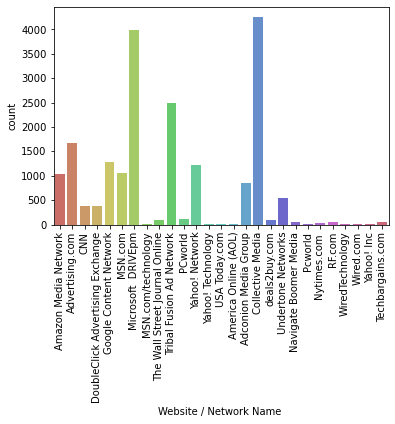

In [10]:
g=sns.countplot(x='Website / Network Name ',data=df, palette='hls')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

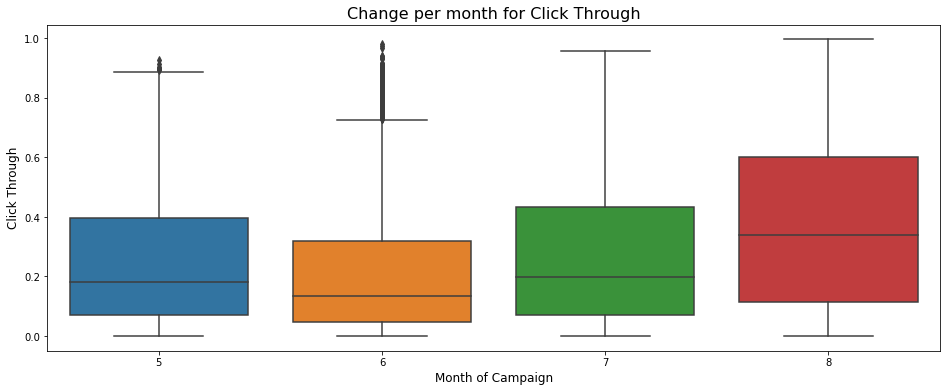

In [11]:
plt.figure(figsize=(16,6))
sns.boxplot(df.Date.dt.month, df.Click_Through)
plt.xlabel('Month of Campaign', fontsize=12)
plt.ylabel('Click Through', fontsize=12)
plt.title('Change per month for Click Through', fontsize=16)
plt.show()

In [12]:
df['dayoftheweek'] =df['Date'].dt.day_name()
df.head()

,Date,Campaign_Name,Content_Category,Creative_Product,Creative,Creative_Size,Website / Network Name,Impressions_Delivered,Clicks_Recorded,Media_Cost,Units_sold,Click_Through,Conversion,dayoftheweek
0,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,300x250,Amazon Media Network,2169.0,988.0,6.765564,0.0,0.455509,0.0,Thursday
1,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Save Money Blue Logo,300x250,Amazon Media Network,1345.0,988.0,6.391223,0.0,0.734572,0.0,Thursday
2,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Better Than Average,300x250,Amazon Media Network,2253.0,1087.0,6.421077,0.0,0.482468,0.0,Thursday
3,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Better Than Average,300x250,Amazon Media Network,2281.0,1074.0,6.786280,0.0,0.470846,0.0,Thursday
4,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Best value Tab,300x250,Amazon Media Network,2193.0,1041.0,6.472956,0.0,0.474692,0.0,Thursday


In [13]:
df['month'] =df['Date'].dt.month_name()
df.head()

,Date,Campaign_Name,Content_Category,Creative_Product,Creative,Creative_Size,Website / Network Name,Impressions_Delivered,Clicks_Recorded,Media_Cost,Units_sold,Click_Through,Conversion,dayoftheweek,month
0,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,300x250,Amazon Media Network,2169.0,988.0,6.765564,0.0,0.455509,0.0,Thursday,May
1,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Save Money Blue Logo,300x250,Amazon Media Network,1345.0,988.0,6.391223,0.0,0.734572,0.0,Thursday,May
2,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Better Than Average,300x250,Amazon Media Network,2253.0,1087.0,6.421077,0.0,0.482468,0.0,Thursday,May
3,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Better Than Average,300x250,Amazon Media Network,2281.0,1074.0,6.786280,0.0,0.470846,0.0,Thursday,May
4,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Best value Tab,300x250,Amazon Media Network,2193.0,1041.0,6.472956,0.0,0.474692,0.0,Thursday,May


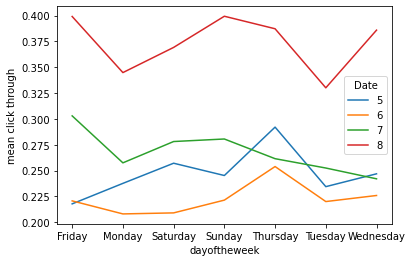

In [14]:
df.pivot_table('Click_Through', index='dayoftheweek',
                    columns=df.Date.dt.month, aggfunc='mean').plot()
plt.ylabel('mean click through');

In [15]:
df1=df[:]
df2 = df1.groupby(df1['Date']).mean()

In [16]:
df2.reset_index(inplace=True)

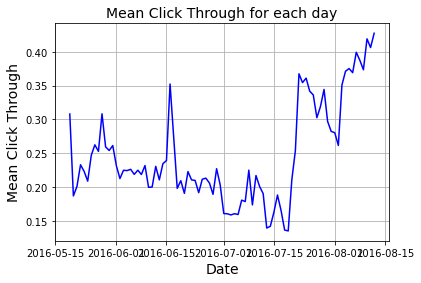

In [17]:
plt.plot(df2.Date, df2.Click_Through, color='blue')
plt.title('Mean Click Through for each day', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Click Through', fontsize=14)
plt.grid(True)
plt.show()

In [18]:
df['Website / Network Name ']

0        Amazon Media Network
1        Amazon Media Network
2        Amazon Media Network
3        Amazon Media Network
4        Amazon Media Network
                 ...         
19730          Yahoo! Network
19731          Yahoo! Network
19732          Yahoo! Network
19733          Yahoo! Network
19734          Yahoo! Network
Name: Website / Network Name , Length: 19735, dtype: object

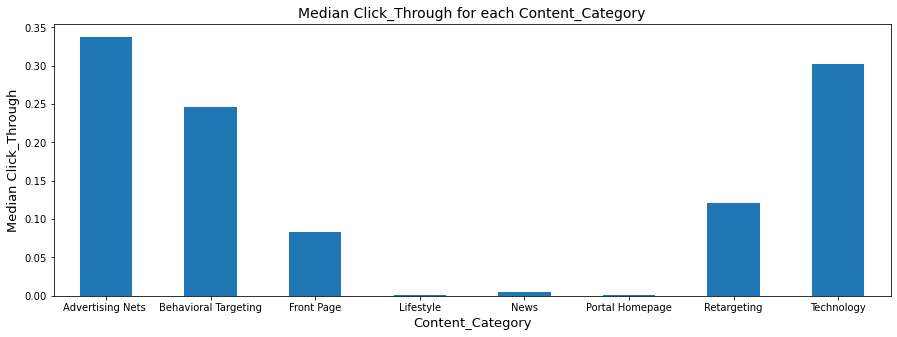

In [19]:
plt.figure(figsize=(15,5))
df.groupby('Content_Category').Click_Through.mean().plot(kind='bar')
plt.title('Median Click_Through for each Content_Category', fontsize=14)
plt.xlabel('Content_Category', fontsize=13)
plt.ylabel('Median Click_Through', fontsize=13)
plt.xticks(rotation=0)
plt.show()

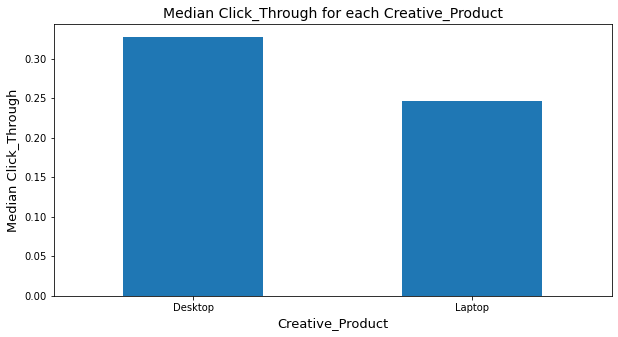

In [20]:
plt.figure(figsize=(10,5))
df.groupby('Creative_Product').Click_Through.mean().plot(kind='bar')
plt.title('Median Click_Through for each Creative_Product', fontsize=14)
plt.xlabel('Creative_Product', fontsize=13)
plt.ylabel('Median Click_Through', fontsize=13)
plt.xticks(rotation=0)
plt.show()

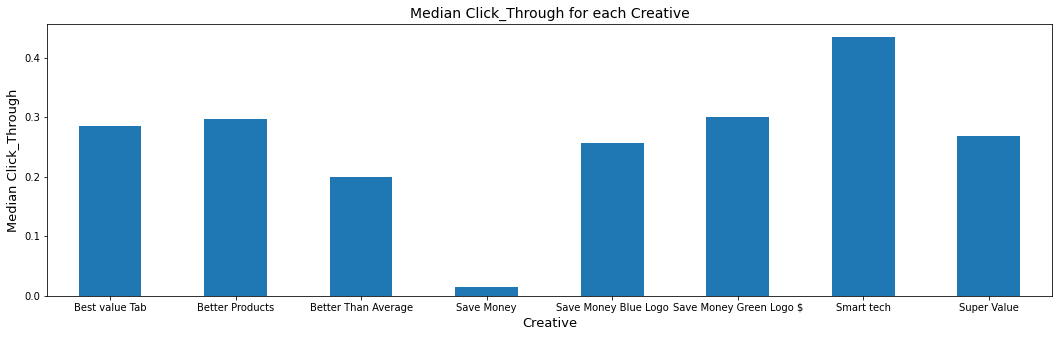

In [21]:
plt.figure(figsize=(18,5))
df.groupby('Creative').Click_Through.mean().plot(kind='bar')
plt.title('Median Click_Through for each Creative', fontsize=14)
plt.xlabel('Creative', fontsize=13)
plt.ylabel('Median Click_Through', fontsize=13)
plt.xticks(rotation=0)
plt.show()

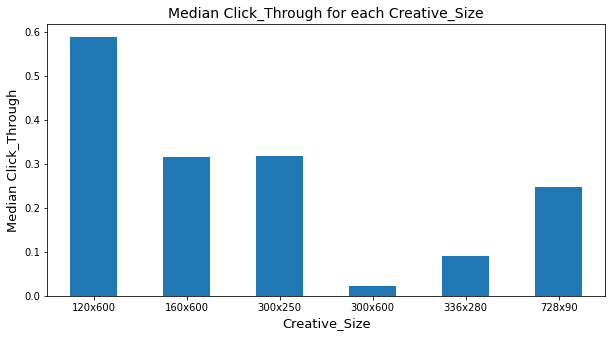

In [22]:
plt.figure(figsize=(10,5))
df.groupby('Creative_Size').Click_Through.mean().plot(kind='bar')
plt.title('Median Click_Through for each Creative_Size', fontsize=14)
plt.xlabel('Creative_Size', fontsize=13)
plt.ylabel('Median Click_Through', fontsize=13)
plt.xticks(rotation=0)
plt.show()

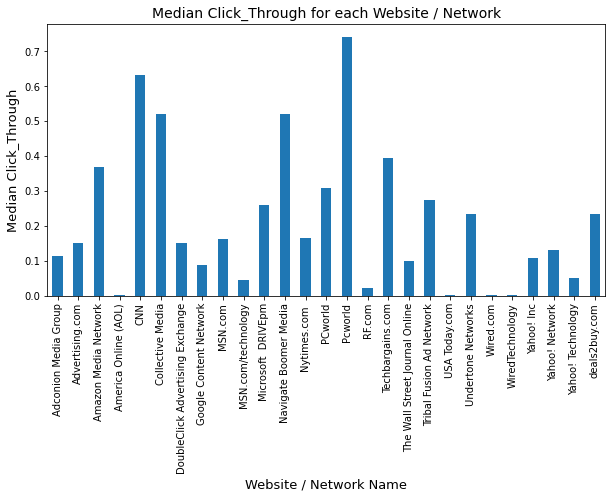

In [23]:
plt.figure(figsize=(10,5))
df.groupby('Website / Network Name ').Click_Through.mean().plot(kind='bar')
plt.title('Median Click_Through for each Website / Network', fontsize=14)
plt.xlabel('Website / Network Name', fontsize=13)
plt.ylabel('Median Click_Through', fontsize=13)
# plt.xticks(rotation=1)
plt.show()

## EDA- Conversion Rate 

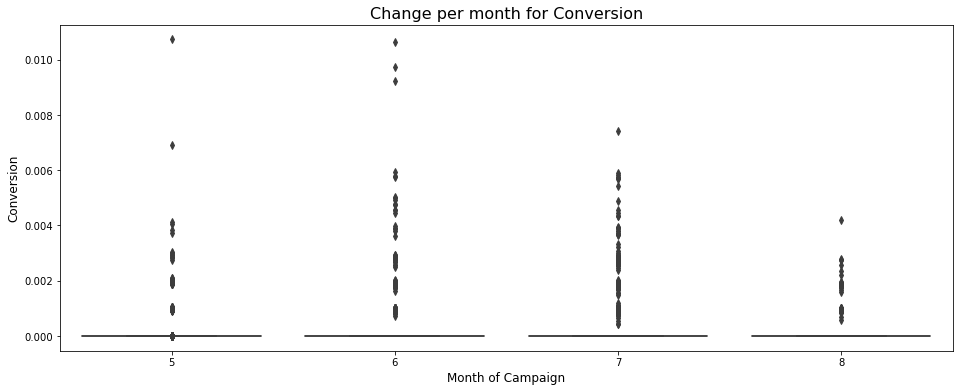

In [24]:
plt.figure(figsize=(16,6))
sns.boxplot(df.Date.dt.month, df.Conversion)
plt.xlabel('Month of Campaign', fontsize=12)
plt.ylabel('Conversion', fontsize=12)
plt.title('Change per month for Conversion', fontsize=16)
plt.show()

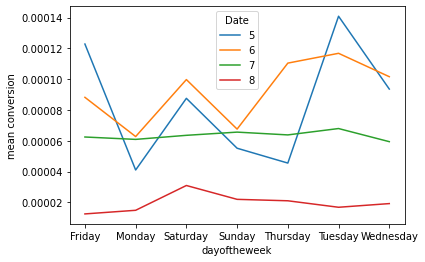

In [25]:
df.pivot_table('Conversion', index='dayoftheweek',
                    columns=df.Date.dt.month, aggfunc='mean').plot()
plt.ylabel('mean conversion');

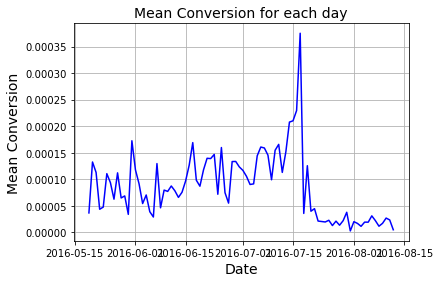

In [26]:
plt.plot(df2.Date, df2.Conversion, color='blue')
plt.title('Mean Conversion for each day', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Conversion', fontsize=14)
plt.grid(True)
plt.show()

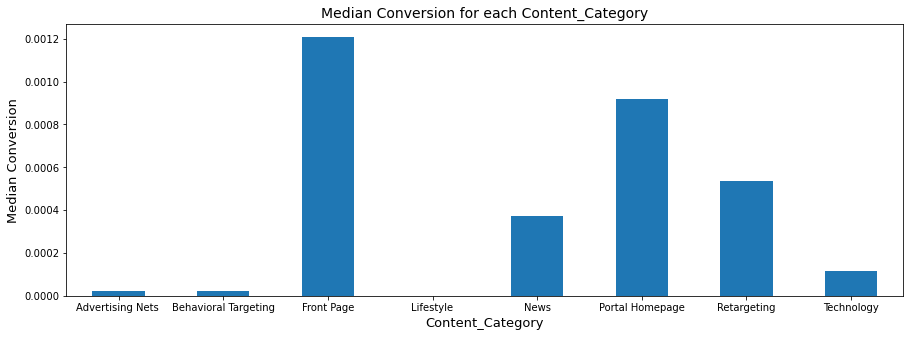

In [27]:
plt.figure(figsize=(15,5))
df.groupby('Content_Category').Conversion.mean().plot(kind='bar')
plt.title('Median Conversion for each Content_Category', fontsize=14)
plt.xlabel('Content_Category', fontsize=13)
plt.ylabel('Median Conversion', fontsize=13)
plt.xticks(rotation=0)
plt.show()

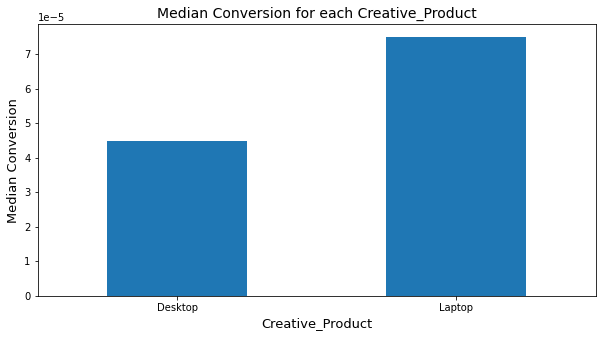

In [28]:
plt.figure(figsize=(10,5))
df.groupby('Creative_Product').Conversion.mean().plot(kind='bar')
plt.title('Median Conversion for each Creative_Product', fontsize=14)
plt.xlabel('Creative_Product', fontsize=13)
plt.ylabel('Median Conversion', fontsize=13)
plt.xticks(rotation=0)
plt.show()

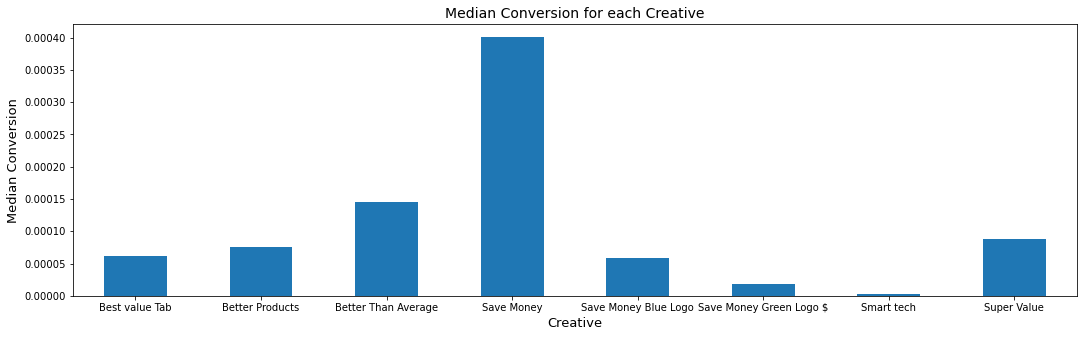

In [29]:
plt.figure(figsize=(18,5))
df.groupby('Creative').Conversion.mean().plot(kind='bar')
plt.title('Median Conversion for each Creative', fontsize=14)
plt.xlabel('Creative', fontsize=13)
plt.ylabel('Median Conversion', fontsize=13)
plt.xticks(rotation=0)
plt.show()

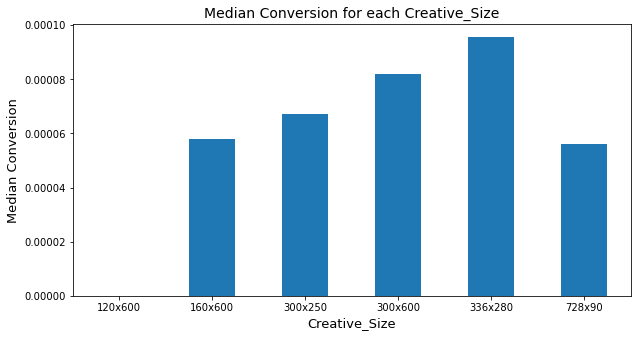

In [30]:
plt.figure(figsize=(10,5))
df.groupby('Creative_Size').Conversion.mean().plot(kind='bar')
plt.title('Median Conversion for each Creative_Size', fontsize=14)
plt.xlabel('Creative_Size', fontsize=13)
plt.ylabel('Median Conversion', fontsize=13)
plt.xticks(rotation=0)
plt.show()

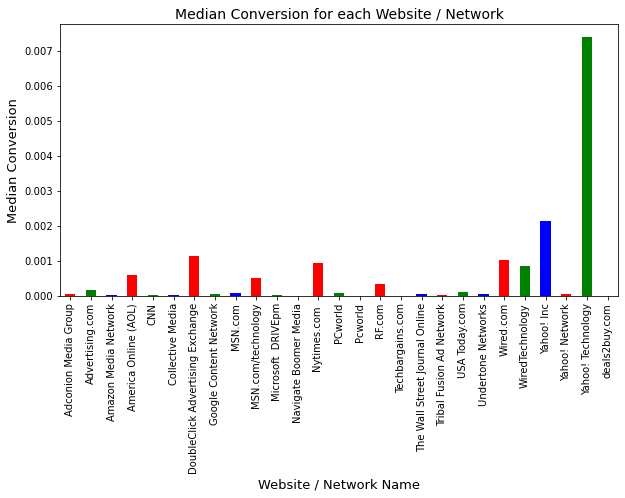

In [31]:
plt.figure(figsize=(10,5))
df.groupby('Website / Network Name ').Conversion.mean().plot(kind='bar',color=['red','green','blue'])
plt.title('Median Conversion for each Website / Network', fontsize=14)
plt.xlabel('Website / Network Name', fontsize=13)
plt.ylabel('Median Conversion', fontsize=13)
# plt.xticks(rotation=1)
plt.show()

## Click-Through Rate Model

In [32]:
df = pd.get_dummies(data=df, columns=['Campaign_Name','Content_Category','Creative_Product','Creative','Creative_Size','Website / Network Name ','dayoftheweek','month'], drop_first=True)

In [33]:
y=df['Click_Through']

In [34]:
y

0        0.455509
1        0.734572
2        0.482468
3        0.470846
4        0.474692
           ...   
19730    0.034152
19731    0.067377
19732    0.037021
19733    0.050708
19734    0.038762
Name: Click_Through, Length: 19735, dtype: float64

In [35]:
x =df.drop(['Click_Through','Date','Impressions_Delivered','Clicks_Recorded','Media_Cost','Units_sold','Conversion'], axis=1)

In [36]:
x

,Content_Category_Behavioral Targeting,Content_Category_Front Page,Content_Category_Lifestyle,Content_Category_News,Content_Category_Portal Homepage,Content_Category_Retargeting,Content_Category_Technology,Creative_Product_Laptop,Creative_Better Products,Creative_Better Than Average,...,Website / Network Name _deals2buy.com,dayoftheweek_Monday,dayoftheweek_Saturday,dayoftheweek_Sunday,dayoftheweek_Thursday,dayoftheweek_Tuesday,dayoftheweek_Wednesday,month_July,month_June,month_May
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19731,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19732,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19733,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
import sklearn.model_selection as ms
from sklearn.metrics import mean_squared_error as MSE

In [38]:
(x_train, x_test, y_train, y_test) = ms.train_test_split(x, y, test_size=.20)

### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)

In [40]:
y_pred1 = lr.predict(x_test)
mse_lr = MSE(y_test, y_pred1)
rmse_lr = mse_lr**(1/2)
print("Test set RMSE of Linear Regression:",rmse_lr)

Test set RMSE of Linear Regression: 0.186707859998354


In [41]:
# coef_table = pd.DataFrame(list(x_train.columns)).copy()
# coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
# coef_table

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_lr=r2_score(y_test, y_pred1)
r2_lr

0.4422121444720247

### Decision Tree

In [44]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=0.05, normalize=True).fit(x_train, y_train)

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dt = DecisionTreeRegressor(max_depth=6,
                           min_samples_leaf=0.13,
                           random_state=3)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=0.13, random_state=3)

In [47]:
y_pred4 = dt.predict(x_test)
mse_dt = MSE(y_test, y_pred4)
rmse_dt = mse_dt**(1/2)
print("Test set RMSE of Decision Tree:",rmse_dt)

Test set RMSE of Decision Tree: 0.21274401612393432


In [48]:
r2_dt=r2_score(y_test, y_pred4)
r2_dt

0.2757999359511689

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rf = RandomForestRegressor(max_depth=6, random_state=3)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, random_state=3)

In [50]:
y_pred5 = rf.predict(x_test)
mse_rf = MSE(y_test, y_pred5)
rmse_rf= mse_rf**(1/2)
print("Test set RMSE of Random Forest:",rmse_rf)

Test set RMSE of Random Forest: 0.1772076764629699


In [51]:
r2_rf=r2_score(y_test, y_pred5)
r2_rf

0.49753141499798814

### XGboost

In [52]:
from xgboost import XGBRegressor

In [53]:
xgbr = XGBRegressor(random_state=3)
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=3,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
y_pred6 = xgbr.predict(x_test)
mse_xgbr = MSE(y_test, y_pred6)
rmse_xgbr= mse_xgbr**(1/2)
print("Test set RMSE of xgbr:",rmse_xgbr)

Test set RMSE of xgbr: 0.15532863906108835


In [55]:
r2_xgbr=r2_score(y_test, y_pred6)
r2_xgbr

0.6139470049029019

### CatBoost

In [56]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()
cbr.fit(x_train, y_train)

Learning rate set to 0.063783
0:	learn: 0.2430680	total: 56ms	remaining: 55.9s
1:	learn: 0.2372643	total: 59.3ms	remaining: 29.6s
2:	learn: 0.2318163	total: 62.9ms	remaining: 20.9s
3:	learn: 0.2270202	total: 66.2ms	remaining: 16.5s
4:	learn: 0.2225260	total: 70.7ms	remaining: 14.1s
5:	learn: 0.2185789	total: 75.1ms	remaining: 12.4s
6:	learn: 0.2149544	total: 78.3ms	remaining: 11.1s
7:	learn: 0.2116559	total: 81.2ms	remaining: 10.1s
8:	learn: 0.2085999	total: 84.6ms	remaining: 9.32s
9:	learn: 0.2059662	total: 88.8ms	remaining: 8.79s
10:	learn: 0.2036114	total: 92.8ms	remaining: 8.34s
11:	learn: 0.2014689	total: 95.8ms	remaining: 7.88s
12:	learn: 0.1992251	total: 99.4ms	remaining: 7.55s
13:	learn: 0.1975210	total: 103ms	remaining: 7.22s
14:	learn: 0.1958388	total: 108ms	remaining: 7.1s
15:	learn: 0.1945239	total: 111ms	remaining: 6.85s
16:	learn: 0.1932904	total: 115ms	remaining: 6.63s
17:	learn: 0.1920668	total: 118ms	remaining: 6.43s
18:	learn: 0.1906522	total: 122ms	remaining: 6.29s
1

173:	learn: 0.1595037	total: 1.46s	remaining: 6.93s
174:	learn: 0.1594540	total: 1.47s	remaining: 6.91s
175:	learn: 0.1594213	total: 1.47s	remaining: 6.89s
176:	learn: 0.1594085	total: 1.48s	remaining: 6.86s
177:	learn: 0.1593700	total: 1.48s	remaining: 6.83s
178:	learn: 0.1593508	total: 1.48s	remaining: 6.8s
179:	learn: 0.1592184	total: 1.48s	remaining: 6.76s
180:	learn: 0.1591674	total: 1.49s	remaining: 6.76s
181:	learn: 0.1591236	total: 1.5s	remaining: 6.75s
182:	learn: 0.1590761	total: 1.51s	remaining: 6.73s
183:	learn: 0.1589745	total: 1.51s	remaining: 6.71s
184:	learn: 0.1588816	total: 1.52s	remaining: 6.68s
185:	learn: 0.1587965	total: 1.52s	remaining: 6.65s
186:	learn: 0.1587434	total: 1.52s	remaining: 6.62s
187:	learn: 0.1586877	total: 1.53s	remaining: 6.59s
188:	learn: 0.1586034	total: 1.53s	remaining: 6.58s
189:	learn: 0.1585403	total: 1.54s	remaining: 6.56s
190:	learn: 0.1584851	total: 1.54s	remaining: 6.54s
191:	learn: 0.1584109	total: 1.55s	remaining: 6.52s
192:	learn: 0.

335:	learn: 0.1533313	total: 2.4s	remaining: 4.74s
336:	learn: 0.1533173	total: 2.42s	remaining: 4.75s
337:	learn: 0.1532957	total: 2.42s	remaining: 4.75s
338:	learn: 0.1532679	total: 2.44s	remaining: 4.75s
339:	learn: 0.1532425	total: 2.45s	remaining: 4.75s
340:	learn: 0.1532395	total: 2.46s	remaining: 4.75s
341:	learn: 0.1532266	total: 2.46s	remaining: 4.74s
342:	learn: 0.1531974	total: 2.46s	remaining: 4.72s
343:	learn: 0.1531487	total: 2.47s	remaining: 4.71s
344:	learn: 0.1531314	total: 2.47s	remaining: 4.7s
345:	learn: 0.1530885	total: 2.48s	remaining: 4.7s
346:	learn: 0.1530790	total: 2.49s	remaining: 4.69s
347:	learn: 0.1530755	total: 2.5s	remaining: 4.68s
348:	learn: 0.1530664	total: 2.5s	remaining: 4.67s
349:	learn: 0.1530518	total: 2.51s	remaining: 4.66s
350:	learn: 0.1529966	total: 2.51s	remaining: 4.64s
351:	learn: 0.1529405	total: 2.52s	remaining: 4.64s
352:	learn: 0.1529104	total: 2.52s	remaining: 4.63s
353:	learn: 0.1528682	total: 2.53s	remaining: 4.62s
354:	learn: 0.152

511:	learn: 0.1499385	total: 3.59s	remaining: 3.42s
512:	learn: 0.1499293	total: 3.6s	remaining: 3.41s
513:	learn: 0.1499216	total: 3.61s	remaining: 3.41s
514:	learn: 0.1499079	total: 3.61s	remaining: 3.4s
515:	learn: 0.1498983	total: 3.63s	remaining: 3.4s
516:	learn: 0.1498824	total: 3.63s	remaining: 3.39s
517:	learn: 0.1498710	total: 3.64s	remaining: 3.39s
518:	learn: 0.1498603	total: 3.66s	remaining: 3.39s
519:	learn: 0.1498349	total: 3.67s	remaining: 3.39s
520:	learn: 0.1498277	total: 3.67s	remaining: 3.38s
521:	learn: 0.1498118	total: 3.68s	remaining: 3.37s
522:	learn: 0.1498015	total: 3.69s	remaining: 3.37s
523:	learn: 0.1497845	total: 3.69s	remaining: 3.36s
524:	learn: 0.1497664	total: 3.7s	remaining: 3.35s
525:	learn: 0.1497552	total: 3.7s	remaining: 3.34s
526:	learn: 0.1497453	total: 3.71s	remaining: 3.33s
527:	learn: 0.1497192	total: 3.71s	remaining: 3.32s
528:	learn: 0.1497068	total: 3.71s	remaining: 3.31s
529:	learn: 0.1496993	total: 3.72s	remaining: 3.29s
530:	learn: 0.149

682:	learn: 0.1480525	total: 5.05s	remaining: 2.35s
683:	learn: 0.1480453	total: 5.06s	remaining: 2.34s
684:	learn: 0.1480363	total: 5.06s	remaining: 2.33s
685:	learn: 0.1480266	total: 5.07s	remaining: 2.32s
686:	learn: 0.1480195	total: 5.08s	remaining: 2.31s
687:	learn: 0.1480049	total: 5.08s	remaining: 2.3s
688:	learn: 0.1480020	total: 5.08s	remaining: 2.29s
689:	learn: 0.1479934	total: 5.09s	remaining: 2.29s
690:	learn: 0.1479727	total: 5.09s	remaining: 2.28s
691:	learn: 0.1479656	total: 5.1s	remaining: 2.27s
692:	learn: 0.1479615	total: 5.1s	remaining: 2.26s
693:	learn: 0.1479550	total: 5.1s	remaining: 2.25s
694:	learn: 0.1479377	total: 5.11s	remaining: 2.24s
695:	learn: 0.1479224	total: 5.13s	remaining: 2.24s
696:	learn: 0.1479131	total: 5.13s	remaining: 2.23s
697:	learn: 0.1479089	total: 5.14s	remaining: 2.23s
698:	learn: 0.1479024	total: 5.15s	remaining: 2.22s
699:	learn: 0.1478952	total: 5.16s	remaining: 2.21s
700:	learn: 0.1478785	total: 5.17s	remaining: 2.2s
701:	learn: 0.147

879:	learn: 0.1466212	total: 6.37s	remaining: 869ms
880:	learn: 0.1466173	total: 6.38s	remaining: 862ms
881:	learn: 0.1466124	total: 6.38s	remaining: 854ms
882:	learn: 0.1466075	total: 6.39s	remaining: 847ms
883:	learn: 0.1466036	total: 6.4s	remaining: 840ms
884:	learn: 0.1465909	total: 6.41s	remaining: 833ms
885:	learn: 0.1465830	total: 6.42s	remaining: 826ms
886:	learn: 0.1465783	total: 6.43s	remaining: 819ms
887:	learn: 0.1465731	total: 6.44s	remaining: 812ms
888:	learn: 0.1465725	total: 6.45s	remaining: 805ms
889:	learn: 0.1465638	total: 6.46s	remaining: 798ms
890:	learn: 0.1465601	total: 6.46s	remaining: 791ms
891:	learn: 0.1465552	total: 6.47s	remaining: 783ms
892:	learn: 0.1465506	total: 6.47s	remaining: 776ms
893:	learn: 0.1465476	total: 6.48s	remaining: 768ms
894:	learn: 0.1465445	total: 6.48s	remaining: 761ms
895:	learn: 0.1465402	total: 6.49s	remaining: 753ms
896:	learn: 0.1465343	total: 6.49s	remaining: 745ms
897:	learn: 0.1465313	total: 6.5s	remaining: 738ms
898:	learn: 0.

In [57]:
y_pred7 = cbr.predict(x_test)
mse_cbr = MSE(y_test, y_pred7)
rmse_cbr= mse_cbr**(1/2)
print("Test set RMSE of cbr:",rmse_cbr)

Test set RMSE of cbr: 0.1538161723874709


In [58]:
r2_cbr=r2_score(y_test, y_pred7)
r2_cbr

0.6214285556797128

Text(0, 0.5, 'Feature Names')

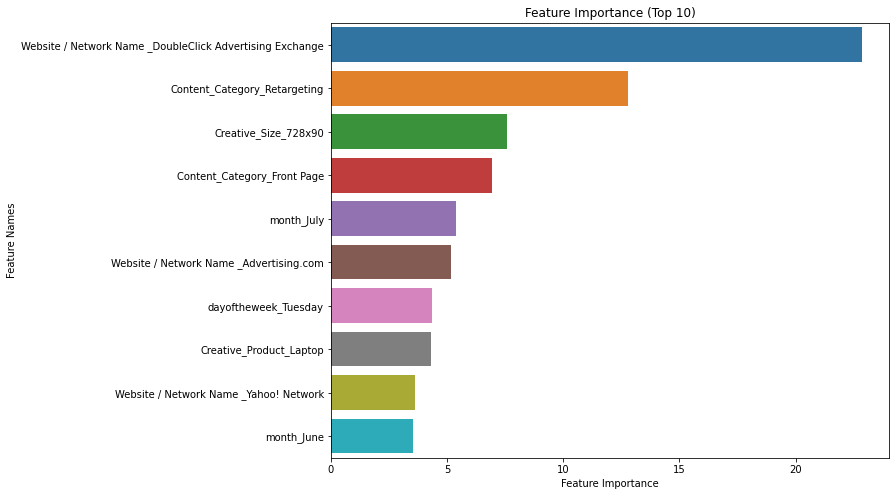

In [73]:
#Generate feature importance plot
from catboost import Pool
fi = pd.DataFrame({'feature_importance': cbr.get_feature_importance(Pool(x_test,y_test)), 
              'feature_names': x_test.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)
plt.figure(figsize = (10, 8))
sns.barplot(x = fi['feature_importance'][:10], y = fi['feature_names'][:10])

plt.title('Feature Importance (Top 10)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

## Conversion Rate Model

In [59]:
x1 =df.drop(['Conversion','Click_Through','Date','Impressions_Delivered','Clicks_Recorded','Media_Cost','Units_sold'], axis=1)
y1=df['Conversion']

In [60]:
(x1_train, x1_test, y1_train, y1_test) = ms.train_test_split(x1, y1, test_size=.20)

### Linear Regression

In [61]:
lr1 = LinearRegression().fit(x1_train, y1_train)
y1_pred1 = lr1.predict(x1_test)
mse_lr1 = MSE(y1_test, y1_pred1)
rmse_lr1 = mse_lr1**(1/2)
print("Test set RMSE of Linear Regression:",rmse_lr1)

Test set RMSE of Linear Regression: 0.00030243825573087


In [62]:
r2_lr1=r2_score(y1_test, y1_pred1)
r2_lr1

0.3156664773881612

### Decision Tree

In [63]:
rg1=Ridge(alpha=0.05, normalize=True).fit(x1_train, y1_train)
dt1 = DecisionTreeRegressor(max_depth=6,
                           min_samples_leaf=0.13,
                           random_state=3)
dt1.fit(x1_train, y1_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=0.13, random_state=3)

In [64]:
y1_pred4 = dt1.predict(x1_test)
mse_dt1 = MSE(y1_test, y1_pred4)
rmse_dt1 = mse_dt1**(1/2)
print("Test set RMSE of Decision Tree:",rmse_dt1)

Test set RMSE of Decision Tree: 0.0003623440761942614


In [65]:
r2_dt1=r2_score(y1_test, y1_pred4)
r2_dt1

0.017716844527966957

### Random Forest

In [66]:
rf1 = RandomForestRegressor(max_depth=6, random_state=3)
rf1.fit(x1_train, y1_train)
y1_pred5 = rf1.predict(x1_test)
mse_rf1 = MSE(y1_test, y1_pred5)
rmse_rf1= mse_rf1**(1/2)
print("Test set RMSE of Random Forest:",rmse_rf1)

Test set RMSE of Random Forest: 0.0003155102500296839


In [67]:
r2_rf1=r2_score(y1_test, y1_pred5)
r2_rf1

0.255231480840165

### XGboost

In [68]:
xgbr1 = XGBRegressor(random_state=3)
xgbr1.fit(x1_train, y1_train)
y1_pred6 = xgbr1.predict(x1_test)
mse_xgbr1 = MSE(y1_test, y1_pred6)
rmse_xgbr1= mse_xgbr1**(1/2)
print("Test set RMSE of xgbr:",rmse_xgbr1)

Test set RMSE of xgbr: 0.00029686838724140717


In [69]:
r2_xgbr1=r2_score(y1_test, y1_pred6)
r2_xgbr1

0.3406404941120337

In [77]:
from xgboost import plot_importance

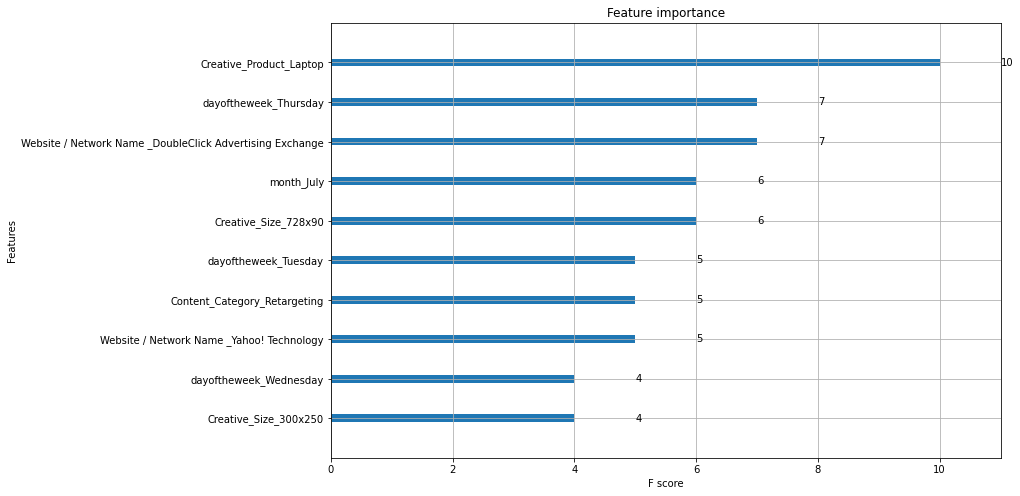

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_importance(xgbr1, max_num_features=10, ax=ax)

### CatBoost

In [70]:
cbr = CatBoostRegressor()
cbr.fit(x1_train, y1_train)
y1_pred7 = cbr.predict(x1_test)
mse_cbr1 = MSE(y1_test, y1_pred7)
rmse_cbr1= mse_cbr1**(1/2)
print("Test set RMSE of cbr:",rmse_cbr1)

Learning rate set to 0.063783
0:	learn: 0.0003746	total: 9.95ms	remaining: 9.94s
1:	learn: 0.0003699	total: 43.2ms	remaining: 21.5s
2:	learn: 0.0003652	total: 64.1ms	remaining: 21.3s
3:	learn: 0.0003600	total: 72.7ms	remaining: 18.1s
4:	learn: 0.0003553	total: 82.5ms	remaining: 16.4s
5:	learn: 0.0003513	total: 104ms	remaining: 17.2s
6:	learn: 0.0003479	total: 135ms	remaining: 19.1s
7:	learn: 0.0003449	total: 151ms	remaining: 18.8s
8:	learn: 0.0003415	total: 155ms	remaining: 17.1s
9:	learn: 0.0003391	total: 158ms	remaining: 15.6s
10:	learn: 0.0003369	total: 161ms	remaining: 14.5s
11:	learn: 0.0003343	total: 175ms	remaining: 14.4s
12:	learn: 0.0003319	total: 182ms	remaining: 13.8s
13:	learn: 0.0003299	total: 191ms	remaining: 13.5s
14:	learn: 0.0003279	total: 196ms	remaining: 12.9s
15:	learn: 0.0003263	total: 201ms	remaining: 12.3s
16:	learn: 0.0003248	total: 207ms	remaining: 11.9s
17:	learn: 0.0003235	total: 215ms	remaining: 11.7s
18:	learn: 0.0003221	total: 220ms	remaining: 11.3s
19:	le

173:	learn: 0.0002878	total: 1.54s	remaining: 7.31s
174:	learn: 0.0002877	total: 1.56s	remaining: 7.36s
175:	learn: 0.0002877	total: 1.56s	remaining: 7.32s
176:	learn: 0.0002875	total: 1.57s	remaining: 7.29s
177:	learn: 0.0002875	total: 1.57s	remaining: 7.26s
178:	learn: 0.0002874	total: 1.58s	remaining: 7.24s
179:	learn: 0.0002873	total: 1.58s	remaining: 7.21s
180:	learn: 0.0002873	total: 1.59s	remaining: 7.18s
181:	learn: 0.0002873	total: 1.59s	remaining: 7.15s
182:	learn: 0.0002873	total: 1.6s	remaining: 7.13s
183:	learn: 0.0002872	total: 1.61s	remaining: 7.13s
184:	learn: 0.0002871	total: 1.61s	remaining: 7.1s
185:	learn: 0.0002867	total: 1.62s	remaining: 7.08s
186:	learn: 0.0002867	total: 1.62s	remaining: 7.05s
187:	learn: 0.0002865	total: 1.63s	remaining: 7.03s
188:	learn: 0.0002864	total: 1.63s	remaining: 7.01s
189:	learn: 0.0002864	total: 1.64s	remaining: 6.99s
190:	learn: 0.0002864	total: 1.64s	remaining: 6.96s
191:	learn: 0.0002863	total: 1.65s	remaining: 6.93s
192:	learn: 0.

332:	learn: 0.0002779	total: 2.68s	remaining: 5.37s
333:	learn: 0.0002779	total: 2.69s	remaining: 5.37s
334:	learn: 0.0002778	total: 2.7s	remaining: 5.35s
335:	learn: 0.0002778	total: 2.71s	remaining: 5.35s
336:	learn: 0.0002778	total: 2.71s	remaining: 5.33s
337:	learn: 0.0002778	total: 2.71s	remaining: 5.32s
338:	learn: 0.0002778	total: 2.72s	remaining: 5.3s
339:	learn: 0.0002777	total: 2.72s	remaining: 5.28s
340:	learn: 0.0002776	total: 2.73s	remaining: 5.27s
341:	learn: 0.0002774	total: 2.73s	remaining: 5.25s
342:	learn: 0.0002774	total: 2.74s	remaining: 5.24s
343:	learn: 0.0002773	total: 2.74s	remaining: 5.23s
344:	learn: 0.0002771	total: 2.76s	remaining: 5.23s
345:	learn: 0.0002771	total: 2.77s	remaining: 5.24s
346:	learn: 0.0002770	total: 2.78s	remaining: 5.22s
347:	learn: 0.0002769	total: 2.78s	remaining: 5.21s
348:	learn: 0.0002769	total: 2.79s	remaining: 5.2s
349:	learn: 0.0002767	total: 2.79s	remaining: 5.19s
350:	learn: 0.0002767	total: 2.8s	remaining: 5.18s
351:	learn: 0.00

496:	learn: 0.0002714	total: 3.84s	remaining: 3.89s
497:	learn: 0.0002713	total: 3.87s	remaining: 3.9s
498:	learn: 0.0002713	total: 3.88s	remaining: 3.9s
499:	learn: 0.0002713	total: 3.89s	remaining: 3.89s
500:	learn: 0.0002712	total: 3.91s	remaining: 3.89s
501:	learn: 0.0002712	total: 3.91s	remaining: 3.88s
502:	learn: 0.0002710	total: 3.92s	remaining: 3.88s
503:	learn: 0.0002710	total: 3.93s	remaining: 3.87s
504:	learn: 0.0002710	total: 3.94s	remaining: 3.86s
505:	learn: 0.0002709	total: 3.94s	remaining: 3.85s
506:	learn: 0.0002708	total: 3.95s	remaining: 3.84s
507:	learn: 0.0002708	total: 3.95s	remaining: 3.83s
508:	learn: 0.0002708	total: 3.96s	remaining: 3.82s
509:	learn: 0.0002707	total: 3.96s	remaining: 3.8s
510:	learn: 0.0002707	total: 3.96s	remaining: 3.79s
511:	learn: 0.0002707	total: 3.97s	remaining: 3.78s
512:	learn: 0.0002706	total: 3.97s	remaining: 3.77s
513:	learn: 0.0002706	total: 3.98s	remaining: 3.76s
514:	learn: 0.0002705	total: 3.98s	remaining: 3.75s
515:	learn: 0.0

669:	learn: 0.0002668	total: 5.66s	remaining: 2.79s
670:	learn: 0.0002668	total: 5.66s	remaining: 2.78s
671:	learn: 0.0002668	total: 5.67s	remaining: 2.77s
672:	learn: 0.0002668	total: 5.67s	remaining: 2.76s
673:	learn: 0.0002668	total: 5.68s	remaining: 2.75s
674:	learn: 0.0002668	total: 5.68s	remaining: 2.74s
675:	learn: 0.0002668	total: 5.69s	remaining: 2.73s
676:	learn: 0.0002667	total: 5.69s	remaining: 2.71s
677:	learn: 0.0002666	total: 5.69s	remaining: 2.7s
678:	learn: 0.0002665	total: 5.7s	remaining: 2.69s
679:	learn: 0.0002665	total: 5.7s	remaining: 2.68s
680:	learn: 0.0002665	total: 5.7s	remaining: 2.67s
681:	learn: 0.0002665	total: 5.71s	remaining: 2.66s
682:	learn: 0.0002665	total: 5.71s	remaining: 2.65s
683:	learn: 0.0002665	total: 5.71s	remaining: 2.64s
684:	learn: 0.0002665	total: 5.72s	remaining: 2.63s
685:	learn: 0.0002664	total: 5.72s	remaining: 2.62s
686:	learn: 0.0002664	total: 5.73s	remaining: 2.61s
687:	learn: 0.0002664	total: 5.73s	remaining: 2.6s
688:	learn: 0.000

848:	learn: 0.0002620	total: 7.34s	remaining: 1.31s
849:	learn: 0.0002620	total: 7.36s	remaining: 1.3s
850:	learn: 0.0002620	total: 7.36s	remaining: 1.29s
851:	learn: 0.0002620	total: 7.37s	remaining: 1.28s
852:	learn: 0.0002620	total: 7.37s	remaining: 1.27s
853:	learn: 0.0002620	total: 7.37s	remaining: 1.26s
854:	learn: 0.0002619	total: 7.38s	remaining: 1.25s
855:	learn: 0.0002618	total: 7.38s	remaining: 1.24s
856:	learn: 0.0002617	total: 7.38s	remaining: 1.23s
857:	learn: 0.0002617	total: 7.39s	remaining: 1.22s
858:	learn: 0.0002616	total: 7.39s	remaining: 1.21s
859:	learn: 0.0002615	total: 7.39s	remaining: 1.2s
860:	learn: 0.0002614	total: 7.4s	remaining: 1.19s
861:	learn: 0.0002614	total: 7.4s	remaining: 1.19s
862:	learn: 0.0002613	total: 7.42s	remaining: 1.18s
863:	learn: 0.0002613	total: 7.43s	remaining: 1.17s
864:	learn: 0.0002613	total: 7.44s	remaining: 1.16s
865:	learn: 0.0002613	total: 7.56s	remaining: 1.17s
866:	learn: 0.0002612	total: 7.59s	remaining: 1.17s
867:	learn: 0.00

In [71]:
r2_cbr1=r2_score(y1_test, y1_pred7)
r2_cbr1

0.18691707895594667

In [72]:
new_models = [['Linear Regression',rmse_lr,r2_lr,rmse_lr1,r2_lr1],['Decision Tree',rmse_dt,r2_dt,rmse_dt1,r2_dt1], ['Random Forest',rmse_rf,r2_rf,rmse_rf1,r2_rf1],['XGBoost',rmse_xgbr,r2_xgbr,rmse_xgbr1,r2_xgbr1],['CatBoost',rmse_cbr,r2_cbr,rmse_cbr1,r2_cbr1]]
new_model_compare = pd.DataFrame(new_models, columns = ['Model', 'RMSE(CTR)','R2(CTR)','RMSE(CR)','R2(CR)']) 
new_model_compare

,Model,RMSE(CTR),R2(CTR),RMSE(CR),R2(CR)
0,Linear Regression,0.186708,0.442212,0.000302,0.315666
1,Decision Tree,0.212744,0.275800,0.000362,0.017717
2,Random Forest,0.177208,0.497531,0.000316,0.255231
3,XGBoost,0.155329,0.613947,0.000297,0.340640
4,CatBoost,0.153816,0.621429,0.000330,0.186917


## Conclusion

- We did not include media cost in our model because this metric has already been decided before the campaign is posted.  We think it is irrelevant when we are predicting the click-through rate and conversion rate. 

 - Click Through rate=Clicks_Recorded/Impressions_Delivered
 - Conversion rate=Units_sold/Clicks_Recorded

**For Click-through rate model:**
- Our best model is CatBoost. It has an R2 score of 0.62.
- We transformed the Date variable to Weekdays. This can help us better understand the weekly fluctuation. 
- CatBoost provides state-of-the-art results and it is competitive with any leading machine learning algorithm on the performance front. It can handling categorical features automatically: we can use CatBoost without any explicit pre-processing to convert categories into numbers.
- We found out the top three important features in our model is the double_click advertising exchange from website, retargeting from content category and creative size of 728*90. Click through rate will be significantly influenced by these three features. More click action happened during double click the 728*90 size advertising and retargeting from content category. 




**For Conversion Rate model:**
- We transformed the Date variable to Weekdays. This can help us better understand the weekly fluctuation. 
- Our best model is XGBoost. It has an R2 score of 0.34.
- XGBoost is an efficient and easy-to-use algorithm that delivers high performance and accuracy as compared to other algorithms. Also, it is robust to outliers and less prone to overfitting.
- We found out the top three important features in our model laptop from creative product, Thursday and double_click advertising exchange from website. Conversion rate will be significantly influenced by these three features. More buying action happened during double click the laptop advertising on Thursday. 


**Limitation:**
- User behaviors change throughout the day. People go to work, have lunch, come home from work, socialize, and more. Such activities influence when those users will use the internet to search, download, buy, or generally interact. Knowing when such activities are most likely to happen on a 24hr day will help us to drive up the efficiency of the campaign and improve performance.